In [1]:
import copy

import numpy as np
import scipy as sp
import xarray as xr
from pyspectral import blackbody
from pyspectral.rsr_reader import RelativeSpectralResponse

from pyLRT import RadTran, get_lrt_folder

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


In [2]:
dpi=150

In [2]:
LIBRADTRAN_FOLDER = get_lrt_folder()

In [3]:
# Get radiances for a range of cloud heights
tlrt = RadTran(LIBRADTRAN_FOLDER)
tlrt.options['rte_solver'] = 'disort'
tlrt.options['source'] = 'thermal'
tlrt.options['wavelength'] = '3000 15000'
tlrt.options['output_user'] = 'lambda edir eup uu'
tlrt.options['zout'] = '0 TOA'
tlrt.options['albedo'] = '0.5'
tlrt.options['umu'] = '-1.0 1.0'
tlrt.options['quiet'] = ''
tlrt.options['sza'] = '0'
tlrt.options['mol_abs_param'] = 'reptran fine'
tlrt.options['atmosphere_file'] = f'{LIBRADTRAN_FOLDER}/data/atmmod/afglt.dat'


In [4]:
tdata, _ = tlrt.run(verbose=True)
tlist = [tdata]


In [10]:
tdata

array([[2.99985000e+03, 0.00000000e+00, 1.42390600e-04, 3.68511282e-05,
        4.53243410e-05],
       [2.99985000e+03, 0.00000000e+00, 7.10139600e-05, 0.00000000e+00,
        2.69812772e-05],
       [3.00075000e+03, 0.00000000e+00, 1.37347200e-04, 3.23274544e-05,
        4.37189847e-05],
       ...,
       [1.49812820e+04, 0.00000000e+00, 2.45155600e-01, 0.00000000e+00,
        7.64534548e-02],
       [1.50037600e+04, 0.00000000e+00, 4.70733500e-01, 1.49727434e-01,
        1.49839118e-01],
       [1.50037600e+04, 0.00000000e+00, 1.52020100e-01, 0.00000000e+00,
        4.44529988e-02]])

In [11]:
wavelengths = tdata[1::2, 0]/1e9
radiances = tdata[1::2, 2]/np.pi/100/wavelengths**2
brightness_temperature = blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances.reshape(1,-1))

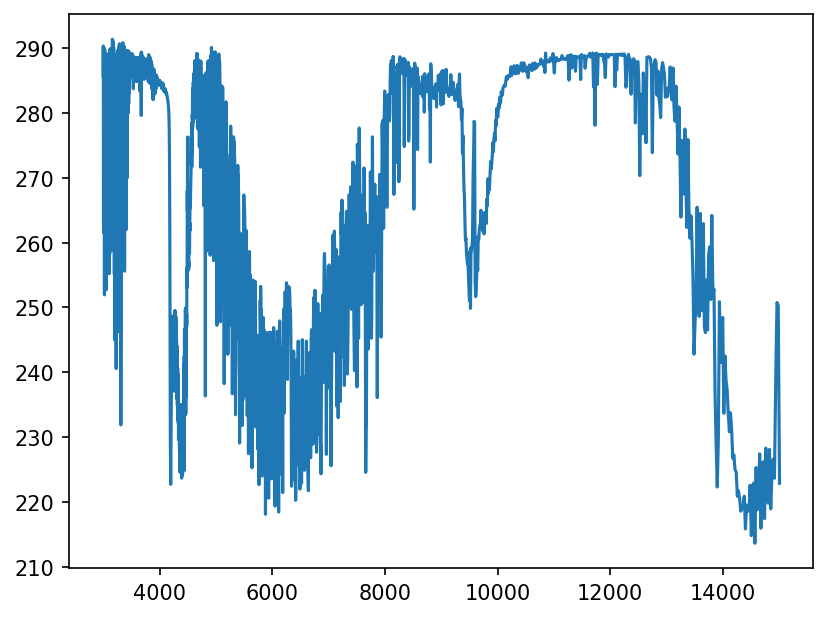

In [12]:
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(
    wavelengths*1e9, 
    brightness_temperature
)

In [30]:
ilrt = copy.deepcopy(tlrt)

ilrt.add_cloud(type="ice", height=14, thickness=2, od=1, re=20)

icdata, _ = ilrt.run(verbose=True)

ilrt_lowcloud = copy.deepcopy(tlrt)

ilrt_lowcloud.add_cloud(type="liquid", height=3, thickness=1, od=20, re=15)

icdata_lowcloud, _ = ilrt_lowcloud.run(verbose=True)

ilrt_withcloud = copy.deepcopy(tlrt)

ilrt_withcloud.add_cloud(type="liquid", height=3, thickness=1, od=20, re=15)
ilrt_withcloud.add_cloud(type="ice", height=14, thickness=2, od=1, re=20)

icdata_withcloud, _ = ilrt_withcloud.run(verbose=True)


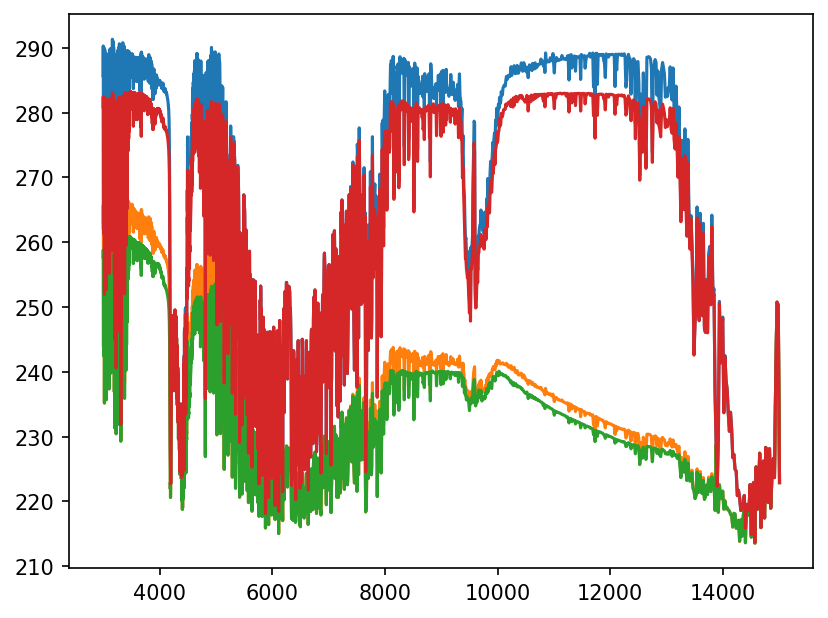

In [31]:
fig, ax1 = plt.subplots(dpi=150)

wavelengths = tdata[1::2, 0]/1e9
radiances = tdata[1::2, 2]/np.pi/100/wavelengths**2
brightness_temperature = blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances.reshape(1,-1))

ax1.plot(
    wavelengths*1e9, 
    brightness_temperature
)

wavelengths = icdata[1::2, 0]/1e9
radiances = icdata[1::2, 2]/np.pi/100/wavelengths**2
brightness_temperature = blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances.reshape(1,-1))

ax1.plot(
    wavelengths*1e9, 
    brightness_temperature
)

wavelengths = icdata_withcloud[1::2, 0]/1e9
radiances = icdata_withcloud[1::2, 2]/np.pi/100/wavelengths**2
brightness_temperature = blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances.reshape(1,-1))

ax1.plot(
    wavelengths*1e9, 
    brightness_temperature
)

wavelengths = icdata_lowcloud[1::2, 0]/1e9
radiances = icdata_lowcloud[1::2, 2]/np.pi/100/wavelengths**2
brightness_temperature = blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances.reshape(1,-1))

ax1.plot(
    wavelengths*1e9, 
    brightness_temperature
)

In [32]:
odlist = np.arange(0.125,1,0.125).tolist() + np.arange(1,2,0.25).tolist() + np.arange(2,5,0.5).tolist() + np.arange(5,11,1).tolist()

heightlist = [10,12,14]

ilrt = copy.deepcopy(tlrt)

ilist = []

idata, _ = ilrt.run(verbose=True, print_input=True)

ilist.append(idata)

for height in heightlist:
    for od in odlist:
        print(f"Running with cloud at {height} km, {od} optical depth")
        ilrt.add_cloud(type="ice", height=height, thickness=2, od=od, re=20)

        icdata, _ = ilrt.run(verbose=True)
        ilist.append(icdata)


rte_solver disort
source thermal
wavelength 3000 15000
output_user lambda edir eup uu
zout 0 TOA
albedo 0.5
umu -1.0 1.0
sza 0
mol_abs_param reptran fine
atmosphere_file /Users/jonesw/libRadtran-2.0.4/data/atmmod/afglt.dat
verbose 

Running with cloud at 10 km, 0.125 optical depth
Running with cloud at 10 km, 0.25 optical depth
Running with cloud at 10 km, 0.375 optical depth
Running with cloud at 10 km, 0.5 optical depth
Running with cloud at 10 km, 0.625 optical depth
Running with cloud at 10 km, 0.75 optical depth
Running with cloud at 10 km, 0.875 optical depth
Running with cloud at 10 km, 1.0 optical depth
Running with cloud at 10 km, 1.25 optical depth
Running with cloud at 10 km, 1.5 optical depth
Running with cloud at 10 km, 1.75 optical depth
Running with cloud at 10 km, 2.0 optical depth
Running with cloud at 10 km, 2.5 optical depth
Running with cloud at 10 km, 3.0 optical depth
Running with cloud at 10 km, 3.5 optical depth
Running with cloud at 10 km, 4.0 optical depth
Run

In [58]:
bt_ds = xr.Dataset()

wavelengths = tdata[1::2, 0]/1e9
radiances = tdata[1::2, 2]/np.pi/100/wavelengths**2
brightness_temperature = blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances.reshape(1,-1))

dims = ("height", "optical_depth", "wavelength")
coords = {"height": heightlist, "optical_depth": odlist, "wavelength":wavelengths}

bt_ds["clear_sky_bt"] = xr.DataArray(
    brightness_temperature, dims=("wavelength",), coords={"wavelength":wavelengths,}
)

In [59]:
radiances = []
brightness_temperature = []

for idata in ilist[1:]:
    radiances.append(idata[1::2, 2]/np.pi/100/wavelengths**2)
    brightness_temperature.append(
        blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances[-1].reshape(1,-1))
    )

radiances = np.stack(radiances).reshape([len(odlist), len(heightlist), -1])
brightness_temperature = np.stack(brightness_temperature).reshape([len(heightlist), len(odlist), -1])

bt_ds["anvil_bt"] = xr.DataArray(
    brightness_temperature, dims=dims, coords=coords
)

In [60]:
bt_ds

<xarray.Dataset>
Dimensions:        (wavelength: 2668, height: 3, optical_depth: 23)
Coordinates:
  * wavelength     (wavelength) float64 3e-06 3.001e-06 ... 1.498e-05 1.5e-05
  * height         (height) int64 10 12 14
  * optical_depth  (optical_depth) float64 0.125 0.25 0.375 0.5 ... 8.0 9.0 10.0
Data variables:
    clear_sky_bt   (wavelength) float64 285.7 286.9 290.3 ... 250.7 250.3 222.9
    anvil_bt       (height, optical_depth, wavelength) float64 282.3 ... 222.9

Text(0.5, 0, 'Optical depth')

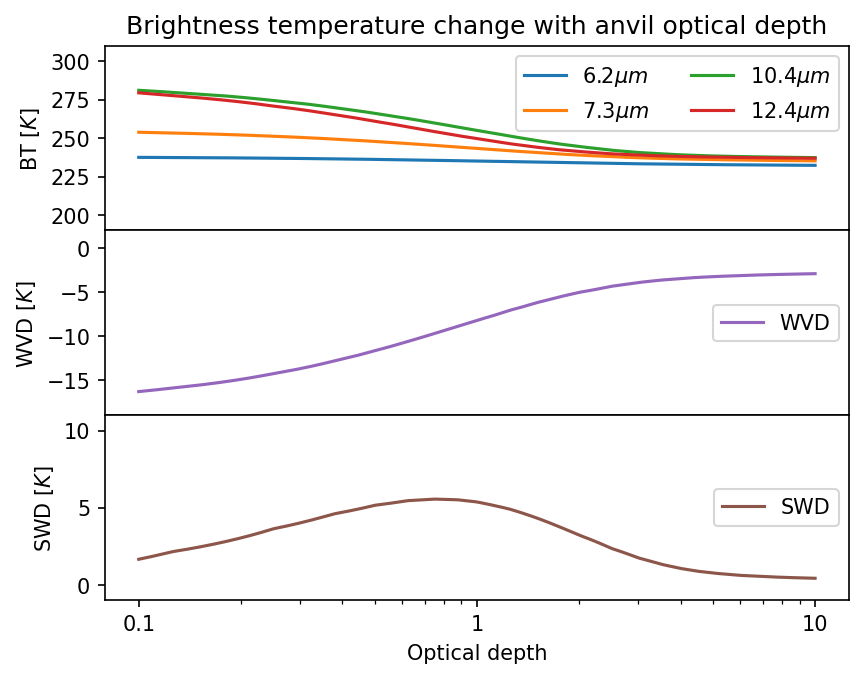

In [63]:
bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength, bt_ds.clear_sky_bt)]
wavelengths = tdata[1::2, 0]/1e9
for i in range(len(odlist)):
    bt_funcs.append(sp.interpolate.interp1d(
        bt_ds.wavelength, brightness_temperature[0,i]
    ))
    
abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

bt_by_channel = {}
for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
    rsr = abi_rsr.rsr[band]["det-1"]
    wavelengths = rsr["wavelength"]/1e6
    srf = rsr["response"]
    bt_by_channel[band] = [np.average(bt(wavelengths), weights=srf) for bt in bt_funcs]

bt_od_func = {band:sp.interpolate.interp1d(
    [0]+odlist, bt_by_channel[band]
) for band in ['ch8','ch10','ch13','ch15']}

fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)
# Plot each graph, and manually set the y tick values
for i, band in enumerate(['ch8','ch10','ch13','ch15']):
    axs[0].plot(xlocs, bt_od_func[band](xvals))
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(['$6.2\mu m$','$7.3\mu m$','$10.4\mu m$','$12.4\mu m$'], ncol=2)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

wvd_od = bt_od_func["ch8"](xvals) - bt_od_func["ch10"](xvals)
axs[1].plot(xlocs, wvd_od,"C4")
axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
axs[1].legend(["WVD"], loc="right")

swd_od = bt_od_func["ch13"](xvals) - bt_od_func["ch15"](xvals)
axs[2].plot(xlocs, swd_od,"C5")
axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
axs[2].legend(["SWD"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

In [56]:
odlist

[0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5,
 6,
 7,
 8,
 9,
 10]

In [64]:
odlist = np.arange(0.125,1,0.125).tolist() + np.arange(1,2,0.25).tolist() + np.arange(2,5,0.5).tolist() + np.arange(5,11,1).tolist()

heightlist = [10,12,14]

ilrt = copy.deepcopy(tlrt)

ilist_cloud = []

ilrt.add_cloud(type="liquid", height=3, thickness=1, od=20, re=15)
idata_cloud, _ = ilrt.run(verbose=True, print_input=True)

ilist_cloud.append(idata_cloud)

for height in heightlist:
    for od in odlist:
        print(f"Running with cloud at {height} km, {od} optical depth")
        ilrt.add_cloud(type="ice", height=height, thickness=2, od=od, re=20)
        ilrt.add_cloud(type="liquid", height=3, thickness=1, od=20, re=15)
        
        icdata_cloud, _ = ilrt.run(verbose=True)
        ilist_cloud.append(icdata_cloud)


Liquid Cloud
  Alt  LWC   Re
 3.00000 0.00000 0.00000
 2.00000 0.20000 15.0000
rte_solver disort
source thermal
wavelength 3000 15000
output_user lambda edir eup uu
zout 0 TOA
albedo 0.5
umu -1.0 1.0
sza 0
mol_abs_param reptran fine
atmosphere_file /Users/jonesw/libRadtran-2.0.4/data/atmmod/afglt.dat
wc_file 1D /var/folders/40/kfr98p0j7n30fjp2n4ljjqbh0000gr/T/tmp0ttntuug
verbose 

Running with cloud at 10 km, 0.125 optical depth
Running with cloud at 10 km, 0.25 optical depth
Running with cloud at 10 km, 0.375 optical depth
Running with cloud at 10 km, 0.5 optical depth
Running with cloud at 10 km, 0.625 optical depth
Running with cloud at 10 km, 0.75 optical depth
Running with cloud at 10 km, 0.875 optical depth
Running with cloud at 10 km, 1.0 optical depth
Running with cloud at 10 km, 1.25 optical depth
Running with cloud at 10 km, 1.5 optical depth
Running with cloud at 10 km, 1.75 optical depth
Running with cloud at 10 km, 2.0 optical depth
Running with cloud at 10 km, 2.5 optical

In [97]:
ilrt = copy.deepcopy(tlrt)
ilrt.add_cloud(type="liquid", height=3, thickness=1, od=20, re=15)
idata_cloud, _ = ilrt.run(verbose=True, print_input=True)
ilist_cloud[0] = idata_cloud

Liquid Cloud
  Alt  LWC   Re
 3.00000 0.00000 0.00000
 2.00000 0.20000 15.0000
rte_solver disort
source thermal
wavelength 3000 15000
output_user lambda edir eup uu
zout 0 TOA
albedo 0.5
umu -1.0 1.0
sza 0
mol_abs_param reptran fine
atmosphere_file /Users/jonesw/libRadtran-2.0.4/data/atmmod/afglt.dat
wc_file 1D /var/folders/40/kfr98p0j7n30fjp2n4ljjqbh0000gr/T/tmpjlq8qjh4
verbose 



In [98]:
wavelengths = ilist_cloud[0][1::2, 0]/1e9
radiances = ilist_cloud[0][1::2, 2]/np.pi/100/wavelengths**2
brightness_temperature = blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances.reshape(1,-1))

bt_ds["low_cloud_bt"] = xr.DataArray(
    brightness_temperature, dims=("wavelength",), coords={"wavelength":wavelengths,}
)

radiances = []
brightness_temperature = []

for idata in ilist_cloud[1:]:
    radiances.append(idata[1::2, 2]/np.pi/100/wavelengths**2)
    brightness_temperature.append(
        blackbody.blackbody_rad2temp(wavelengths.reshape(1,-1), radiances[-1].reshape(1,-1))
    )

radiances = np.stack(radiances).reshape([len(odlist), len(heightlist), -1])
brightness_temperature = np.stack(brightness_temperature).reshape([len(heightlist), len(odlist), -1])

bt_ds["anvil_with_cloud_bt"] = xr.DataArray(
    brightness_temperature, dims=dims, coords=coords
)

In [99]:
bt_ds

<xarray.Dataset>
Dimensions:              (wavelength: 2668, height: 3, optical_depth: 23)
Coordinates:
  * wavelength           (wavelength) float64 3e-06 3.001e-06 ... 1.5e-05
  * height               (height) int64 10 12 14
  * optical_depth        (optical_depth) float64 0.125 0.25 0.375 ... 9.0 10.0
Data variables:
    clear_sky_bt         (wavelength) float64 285.7 286.9 290.3 ... 250.3 222.9
    anvil_bt             (height, optical_depth, wavelength) float64 282.3 .....
    low_cloud_bt         (wavelength) float64 280.9 281.0 282.5 ... 250.3 222.9
    anvil_with_cloud_bt  (height, optical_depth, wavelength) float64 277.6 .....

In [100]:
bt_ds.to_netcdf("pyLRT_anvil_data.nc")

In [3]:
bt_ds = xr.load_dataset("pyLRT_anvil_data.nc")

In [4]:
bt_ds

<xarray.Dataset>
Dimensions:              (wavelength: 2668, height: 3, optical_depth: 23)
Coordinates:
  * wavelength           (wavelength) float64 3e-06 3.001e-06 ... 1.5e-05
  * height               (height) int64 10 12 14
  * optical_depth        (optical_depth) float64 0.125 0.25 0.375 ... 9.0 10.0
Data variables:
    clear_sky_bt         (wavelength) float64 285.7 286.9 290.3 ... 250.3 222.9
    anvil_bt             (height, optical_depth, wavelength) float64 282.3 .....
    low_cloud_bt         (wavelength) float64 280.9 281.0 282.5 ... 250.3 222.9
    anvil_with_cloud_bt  (height, optical_depth, wavelength) float64 277.6 .....

Text(0.5, 0, 'Optical depth')

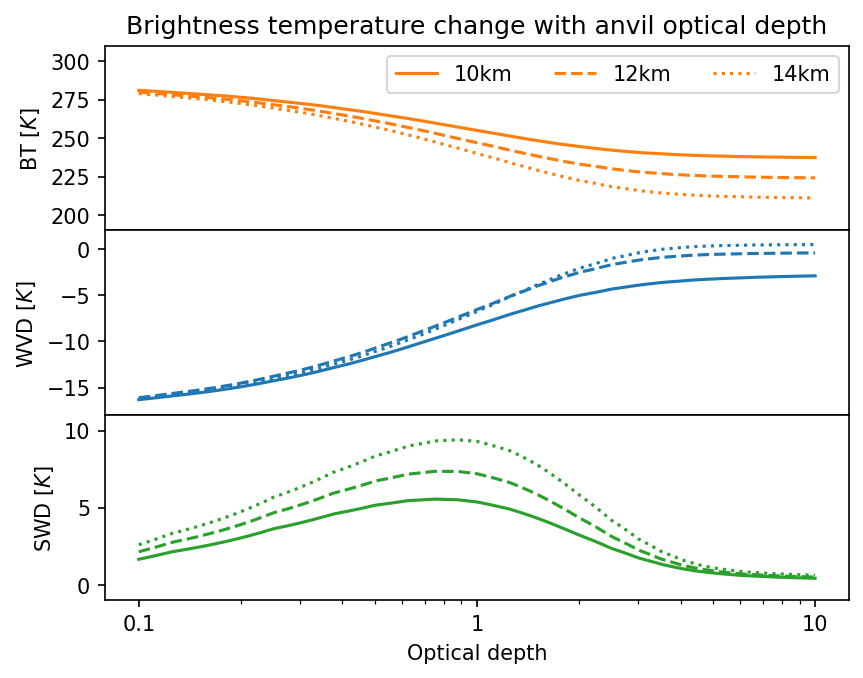

In [5]:
fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(bt_ds.optical_depth.size):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
        rsr = abi_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths), weights=srf) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+bt_ds.optical_depth.values.tolist(), bt_by_channel[band]
    ) for band in ['ch8','ch10','ch13','ch15']}
    
    wvd_od = bt_od_func["ch8"](xvals) - bt_od_func["ch10"](xvals)
    swd_od = bt_od_func["ch13"](xvals) - bt_od_func["ch15"](xvals)
    axs[0].plot(xlocs, bt_od_func["ch13"](xvals), linestyle=linestyles[h], c="C01")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C00")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-18,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_yticks(range(0,11,5))
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

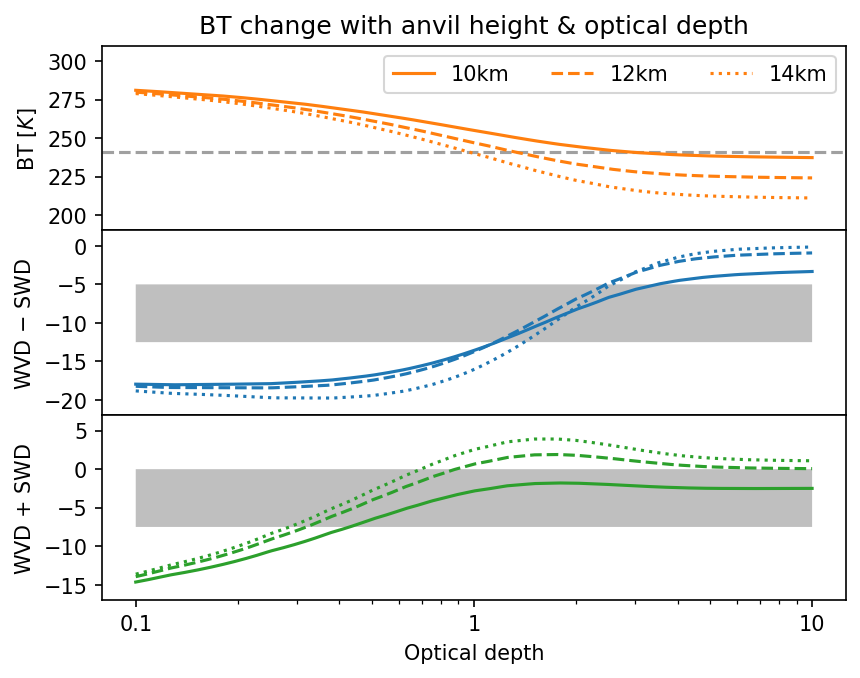

In [6]:
fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(bt_ds.optical_depth.size):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
        rsr = abi_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths), weights=srf) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+bt_ds.optical_depth.values.tolist(), bt_by_channel[band]
    ) for band in ['ch8','ch10','ch13','ch15']}
    
    wvd_od = bt_od_func["ch8"](xvals) - bt_od_func["ch10"](xvals)
    swd_od = bt_od_func["ch13"](xvals) - bt_od_func["ch15"](xvals)
    axs[0].plot(xlocs, bt_od_func["ch13"](xvals), linestyle=linestyles[h], c="C01")
    axs[1].plot(xlocs, wvd_od - swd_od, linestyle=linestyles[h], c="C00")
    axs[2].plot(xlocs, wvd_od + swd_od, linestyle=linestyles[h], c="C02")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))
axs[0].axhline(241, color="grey", ls="--", alpha=0.75, zorder=0)

axs[1].set_ylabel("WVD $-$ SWD")
axs[1].set_yticks(range(-20,1,5))
axs[1].set_ylim([-22,2])
axs[1].fill_between(xlocs, -5, -12.5, color="grey", alpha=0.5, edgecolor="none")
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("WVD $+$ SWD")
axs[2].set_yticks(range(-15,6,5))
axs[2].set_ylim([-17,7])
axs[2].fill_between(xlocs, 0, -7.5, color="grey", alpha=0.5, edgecolor="none")
# axs[2].legend(["SWD"], loc="right")

axs[0].set_title("BT change with anvil height & optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

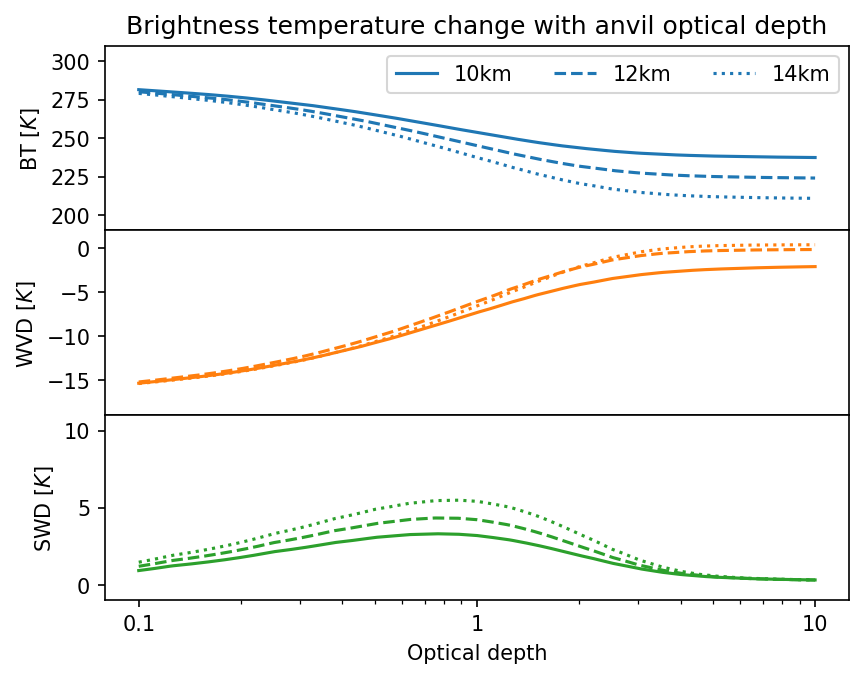

In [16]:
fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

seviri_rsr = RelativeSpectralResponse("Meteosat-11", "seviri")

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(bt_ds.optical_depth.size):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+bt_ds.optical_depth.values.tolist(), bt_by_channel[band]
    ) for band in ['IR6.2','IR7.3','IR10.8','IR12.0']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

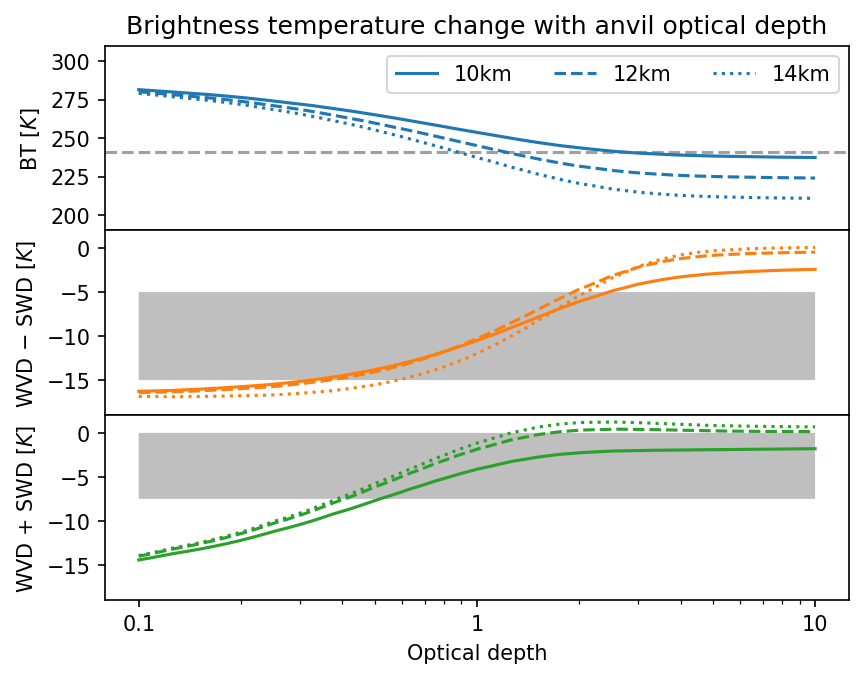

In [17]:
fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

seviri_rsr = RelativeSpectralResponse("Meteosat-11", "seviri")

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(bt_ds.optical_depth.size):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+bt_ds.optical_depth.values.tolist(), bt_by_channel[band]
    ) for band in ['IR6.2','IR7.3','IR10.8','IR12.0']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od - swd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, wvd_od + swd_od, linestyle=linestyles[h], c="C02")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))
axs[0].axhline(241, color="grey", ls="--", alpha=0.75, zorder=0)

axs[1].set_ylabel("WVD $-$ SWD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
axs[1].fill_between(xlocs, -5, -15, color="grey", alpha=0.5, edgecolor="none")

# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("WVD + SWD [$K$]")
axs[2].set_yticks(range(-15,1,5))
axs[2].set_ylim([-19,2])
axs[2].fill_between(xlocs, 0, -7.5, color="grey", alpha=0.5, edgecolor="none")

# axs[2].legend(["SWD"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

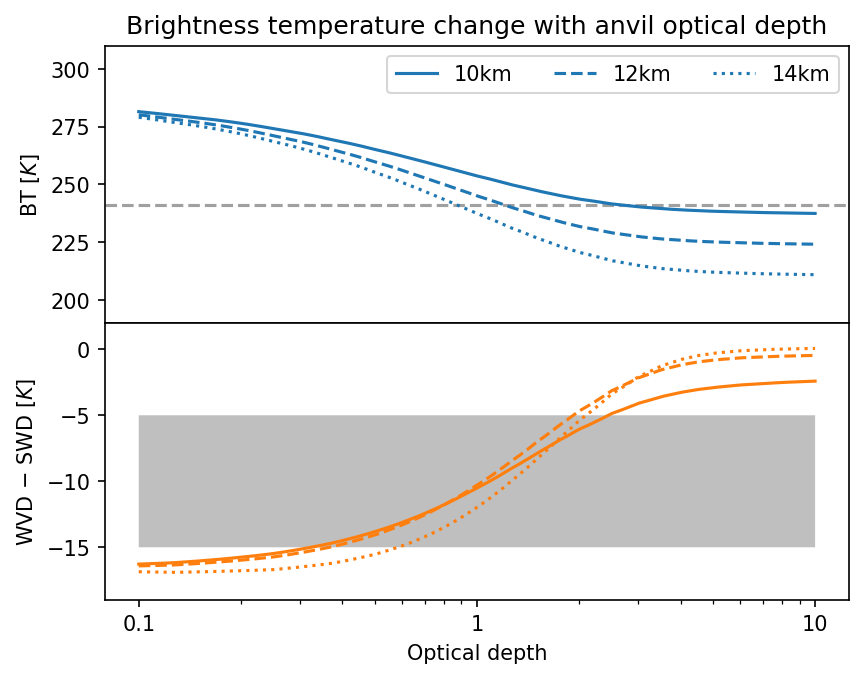

In [18]:
fig, axs = plt.subplots(2, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

seviri_rsr = RelativeSpectralResponse("Meteosat-11", "seviri")

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(bt_ds.optical_depth.size):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+bt_ds.optical_depth.values.tolist(), bt_by_channel[band]
    ) for band in ['IR6.2','IR7.3','IR10.8','IR12.0']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od - swd_od, linestyle=linestyles[h], c="C01")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))
axs[0].axhline(241, color="grey", ls="--", alpha=0.75, zorder=0)

axs[1].set_ylabel("WVD $-$ SWD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
axs[1].fill_between(xlocs, -5, -15, color="grey", alpha=0.5, edgecolor="none")


axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

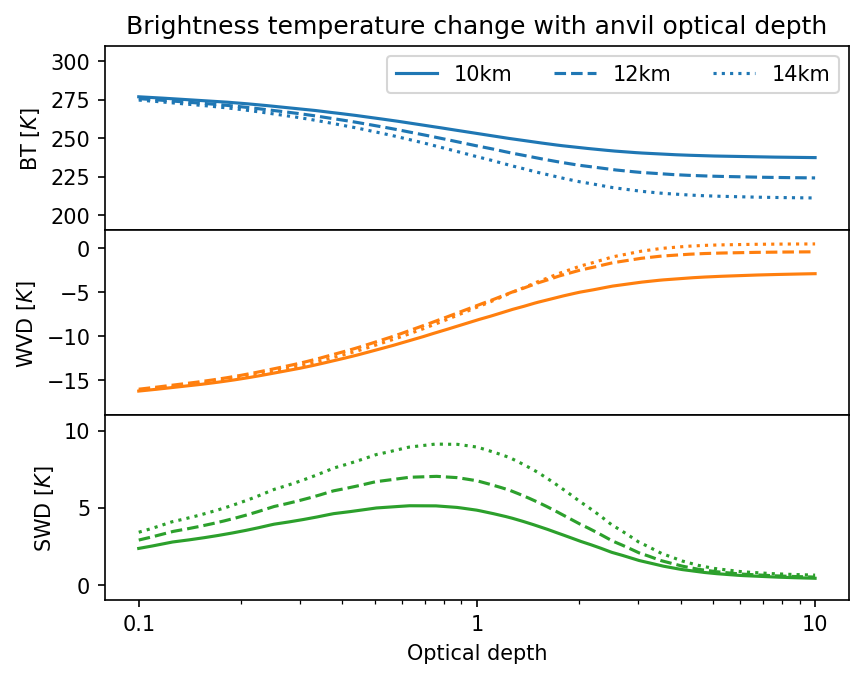

In [102]:
fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.low_cloud_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_with_cloud_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
        rsr = abi_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths), weights=srf) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['ch8','ch10','ch13','ch15']}
    
    wvd_od = bt_od_func["ch8"](xvals) - bt_od_func["ch10"](xvals)
    swd_od = bt_od_func["ch13"](xvals) - bt_od_func["ch15"](xvals)
    axs[0].plot(xlocs, bt_od_func["ch13"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

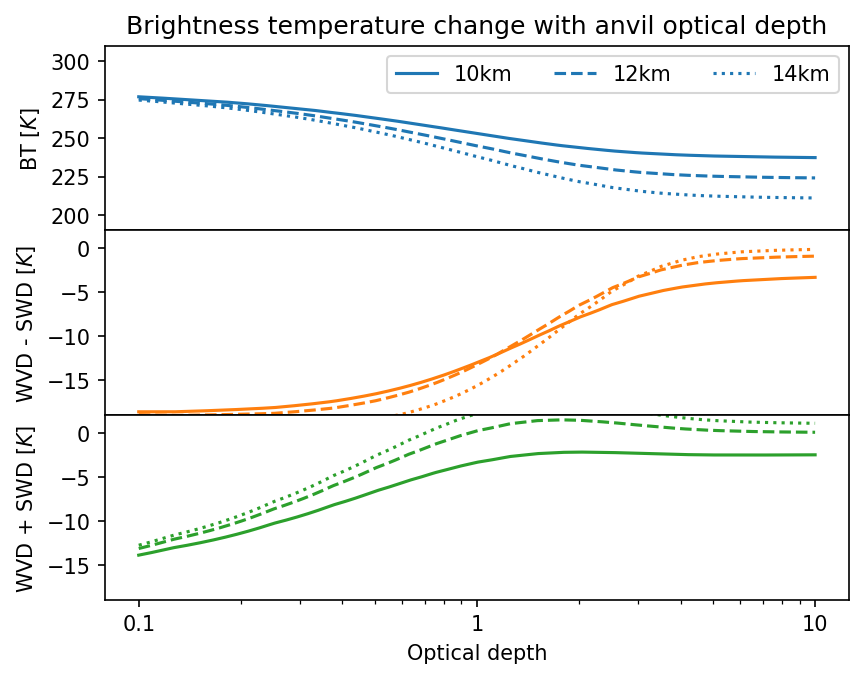

In [114]:
fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.low_cloud_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_with_cloud_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
        rsr = abi_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths), weights=srf) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['ch8','ch10','ch13','ch15']}
    
    wvd_od = bt_od_func["ch8"](xvals) - bt_od_func["ch10"](xvals)
    swd_od = bt_od_func["ch13"](xvals) - bt_od_func["ch15"](xvals)
    axs[0].plot(xlocs, bt_od_func["ch13"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od - swd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, wvd_od + swd_od, linestyle=linestyles[h], c="C02")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD - SWD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("WVD + SWD [$K$]")
axs[2].set_yticks(range(-15,1,5))
axs[2].set_ylim([-19,2])
# axs[2].legend(["SWD"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

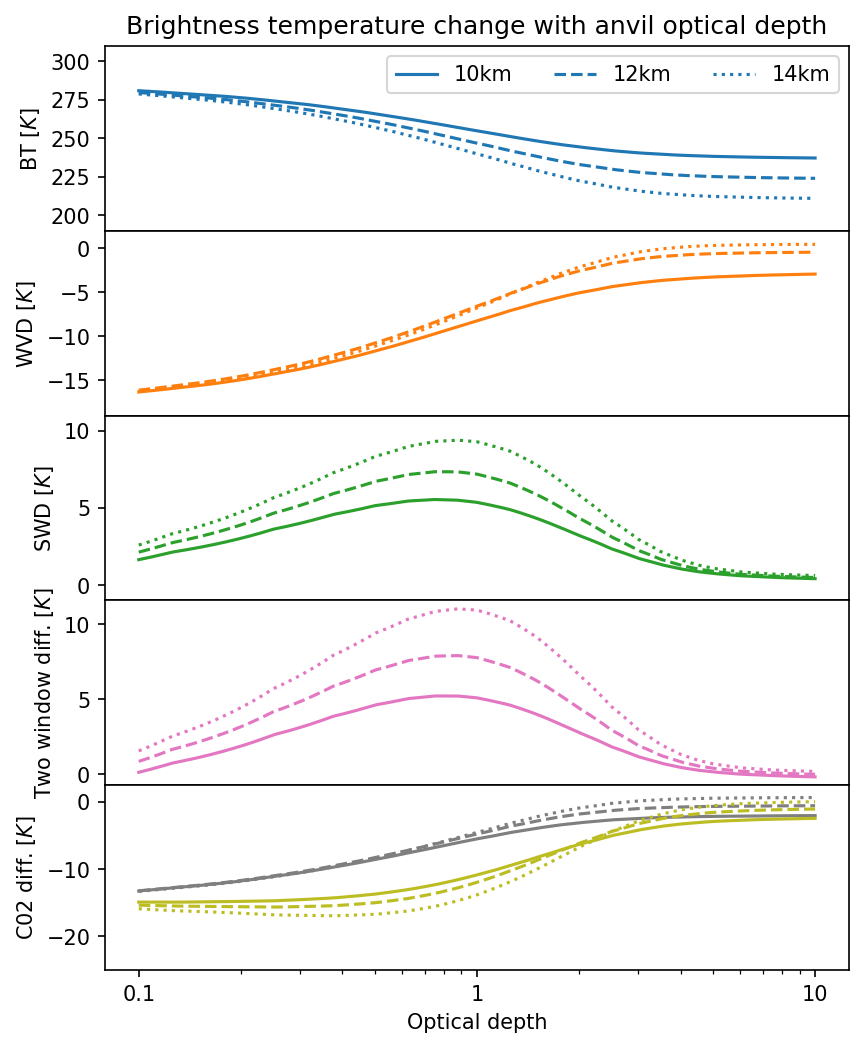

In [107]:
fig, axs = plt.subplots(5, 1, sharex=True, dpi=dpi, figsize=(6.4,8))
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
        rsr = abi_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths), weights=srf) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']}
    
    wvd_od = bt_od_func["ch8"](xvals) - bt_od_func["ch10"](xvals)
    swd_od = bt_od_func["ch13"](xvals) - bt_od_func["ch15"](xvals)
    axs[0].plot(xlocs, bt_od_func["ch13"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
    twd_od = bt_od_func["ch11"](xvals) - bt_od_func["ch15"](xvals)
    axs[3].plot(xlocs, twd_od,"C6", linestyle=linestyles[h])

    co2_od = bt_od_func["ch16"](xvals) - bt_od_func["ch15"](xvals)
    co2_od2 = bt_od_func["ch16"](xvals) - bt_od_func["ch13"](xvals)
    axs[4].plot(xlocs, co2_od,"C7", linestyle=linestyles[h])
    axs[4].plot(xlocs, co2_od2,"C8", linestyle=linestyles[h])

# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[3].set_ylabel("Two window diff. [$K$]")
# axs[3].set_ylim([-1,11])
# axs[3].legend(["Two window"], loc="right")

axs[4].set_ylabel("C02 diff. [$K$]")
axs[4].set_ylim([-25,2.5])
# axs[4].legend(["C0$_2$ - $12.0 \mu m$", "C0$_2$ - $10.8 \mu m$"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

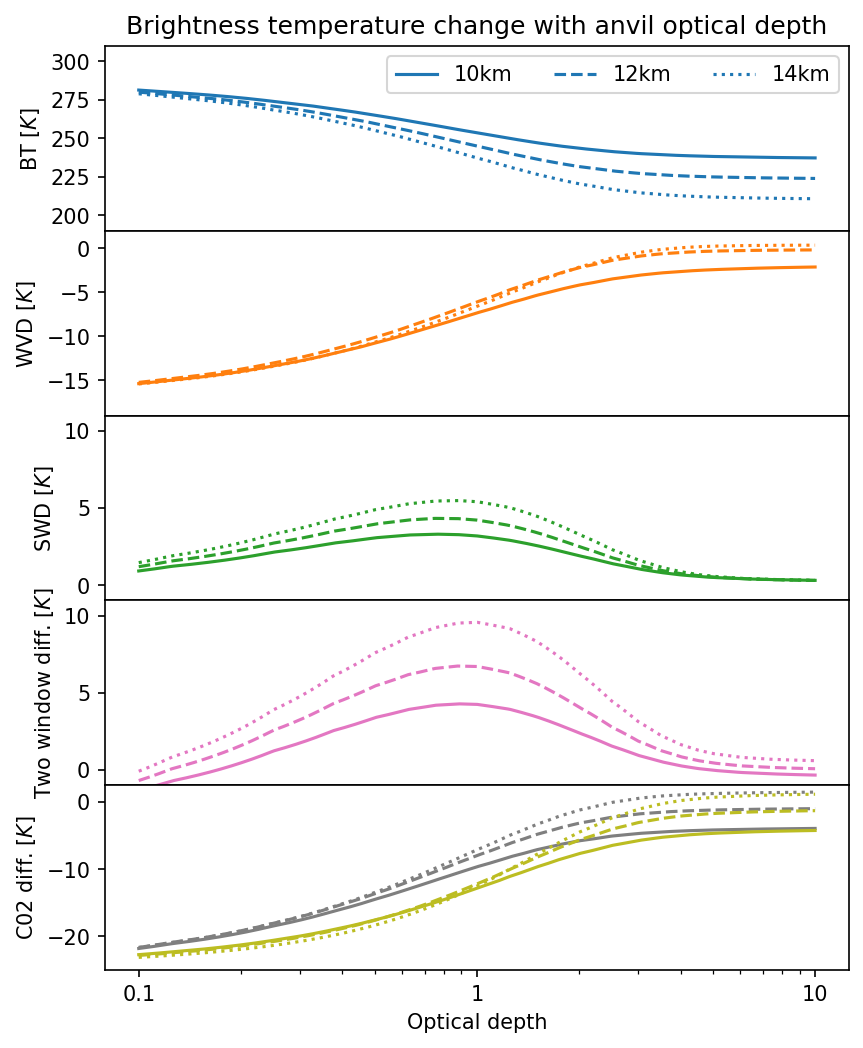

In [119]:
fig, axs = plt.subplots(5, 1, sharex=True, dpi=dpi, figsize=(6.4,8))
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

seviri_rsr = RelativeSpectralResponse("Meteosat-11", "seviri")

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
    twd_od = bt_od_func["IR8.7"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[3].plot(xlocs, twd_od,"C6", linestyle=linestyles[h])

    co2_od = bt_od_func["IR13.4"](xvals) - bt_od_func["IR12.0"](xvals)
    co2_od2 = bt_od_func["IR13.4"](xvals) - bt_od_func["IR10.8"](xvals)
    axs[4].plot(xlocs, co2_od,"C7", linestyle=linestyles[h])
    axs[4].plot(xlocs, co2_od2,"C8", linestyle=linestyles[h])

# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[3].set_ylabel("Two window diff. [$K$]")
axs[3].set_ylim([-1,11])
# axs[3].legend(["Two window"], loc="right")

axs[4].set_ylabel("C02 diff. [$K$]")
axs[4].set_ylim([-25,2.5])
# axs[4].legend(["C0$_2$ - $12.0 \mu m$", "C0$_2$ - $10.8 \mu m$"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

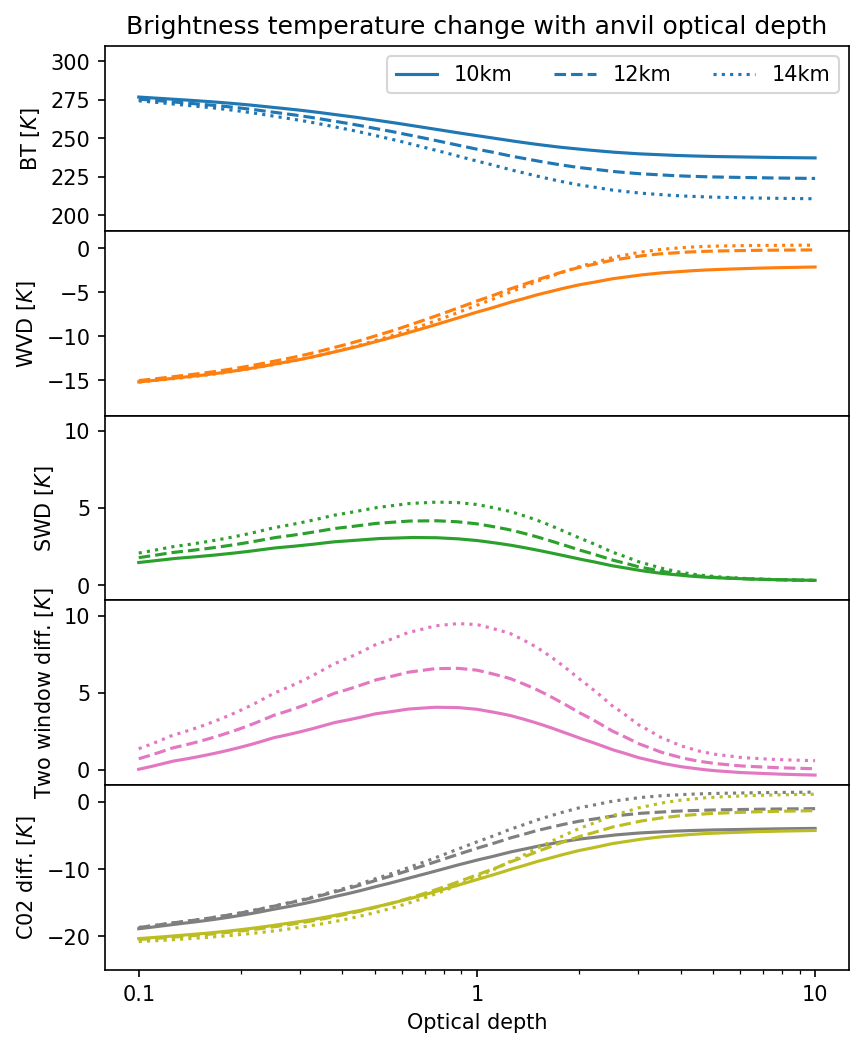

In [118]:
fig, axs = plt.subplots(5, 1, sharex=True, dpi=dpi, figsize=(6.4,8))
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

seviri_rsr = RelativeSpectralResponse("Meteosat-11", "seviri")

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.low_cloud_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_with_cloud_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
    twd_od = bt_od_func["IR8.7"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[3].plot(xlocs, twd_od,"C6", linestyle=linestyles[h])

    co2_od = bt_od_func["IR13.4"](xvals) - bt_od_func["IR12.0"](xvals)
    co2_od2 = bt_od_func["IR13.4"](xvals) - bt_od_func["IR10.8"](xvals)
    axs[4].plot(xlocs, co2_od,"C7", linestyle=linestyles[h])
    axs[4].plot(xlocs, co2_od2,"C8", linestyle=linestyles[h])

# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[3].set_ylabel("Two window diff. [$K$]")
axs[3].set_ylim([-1,11])
# axs[3].legend(["Two window"], loc="right")

axs[4].set_ylabel("C02 diff. [$K$]")
axs[4].set_ylim([-25,2.5])
# axs[4].legend(["C0$_2$ - $12.0 \mu m$", "C0$_2$ - $10.8 \mu m$"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

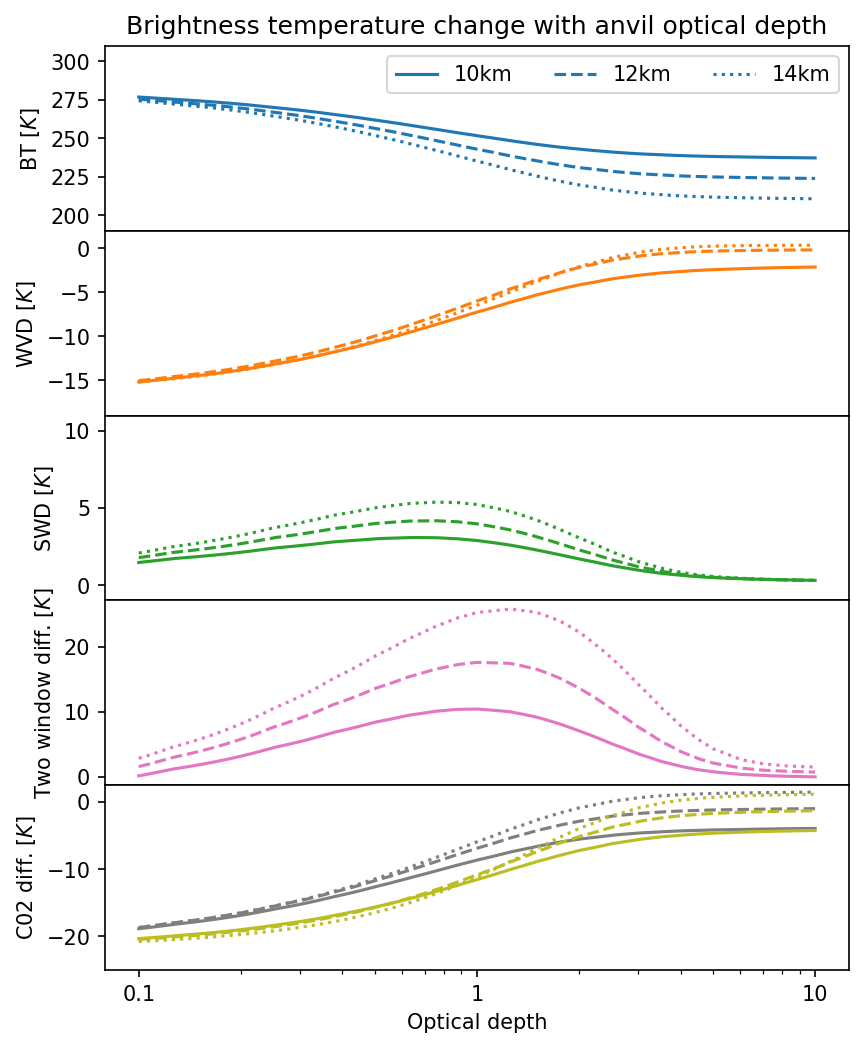

In [117]:
fig, axs = plt.subplots(5, 1, sharex=True, dpi=dpi, figsize=(6.4,8))
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

seviri_rsr = RelativeSpectralResponse("Meteosat-11", "seviri")

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.low_cloud_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_with_cloud_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
    twd_od = bt_od_func["IR3.9"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[3].plot(xlocs, twd_od,"C6", linestyle=linestyles[h])

    co2_od = bt_od_func["IR13.4"](xvals) - bt_od_func["IR12.0"](xvals)
    co2_od2 = bt_od_func["IR13.4"](xvals) - bt_od_func["IR10.8"](xvals)
    axs[4].plot(xlocs, co2_od,"C7", linestyle=linestyles[h])
    axs[4].plot(xlocs, co2_od2,"C8", linestyle=linestyles[h])

# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[3].set_ylabel("Two window diff. [$K$]")
# axs[3].set_ylim([-1,11])
# axs[3].legend(["Two window"], loc="right")

axs[4].set_ylabel("C02 diff. [$K$]")
axs[4].set_ylim([-25,2.5])
# axs[4].legend(["C0$_2$ - $12.0 \mu m$", "C0$_2$ - $10.8 \mu m$"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 1.0, 'Relative spectral response comparison')

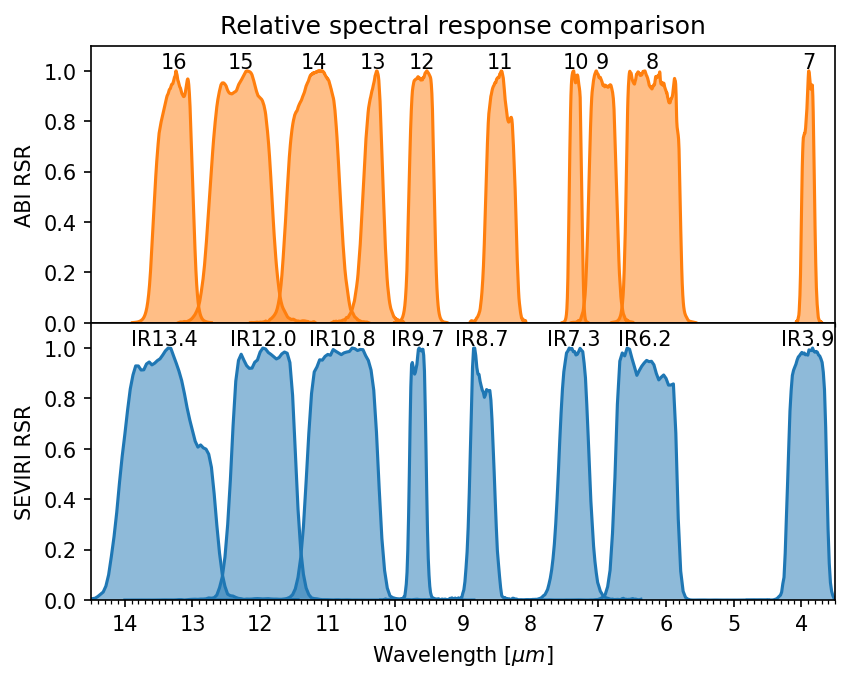

In [140]:
fig, axs = plt.subplots(2, 1, sharex=True, dpi=dpi, figsize=(6.4,4.8))
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

(ax1, ax2) = axs


ax2.set_xticks((np.arange(3000,15001,1000)), np.arange(3,16))
ax2.xaxis.set_ticks(np.arange(3000,15001,100), minor=True)
ax2.set_xlim((14500), (3500))
ax2.set_xlabel("Wavelength [$\mu m$]")

abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
    rsr = abi_rsr.rsr[band]["det-1"]
    ax1.plot((rsr["wavelength"]*1e3), rsr["response"], "C1")
    ax1.fill_between((rsr["wavelength"]*1e3), rsr["response"], facecolor="C1", alpha=0.5)
    ax1.text((rsr["central_wavelength"]*1e3), 1.01, band[2:], ha="center")

seviri_rsr = RelativeSpectralResponse('Meteosat-11', 'seviri')

for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
    rsr = seviri_rsr.rsr[band]["det-1"]
    plt.plot((rsr["wavelength"]*1e3), rsr["response"], "C0")
    plt.fill_between((rsr["wavelength"]*1e3), rsr["response"], facecolor="C0", alpha=0.5)
    plt.text((rsr["central_wavelength"]*1e3), 1.01, band, ha="center")

ax1.set_ylim([0,1.1])
ax1.set_ylabel("ABI RSR")

ax2.set_ylim([0,1.1])
ax2.set_ylabel("SEVIRI RSR")

ax1.set_title("Relative spectral response comparison")


Text(0.5, 0, 'Optical depth')

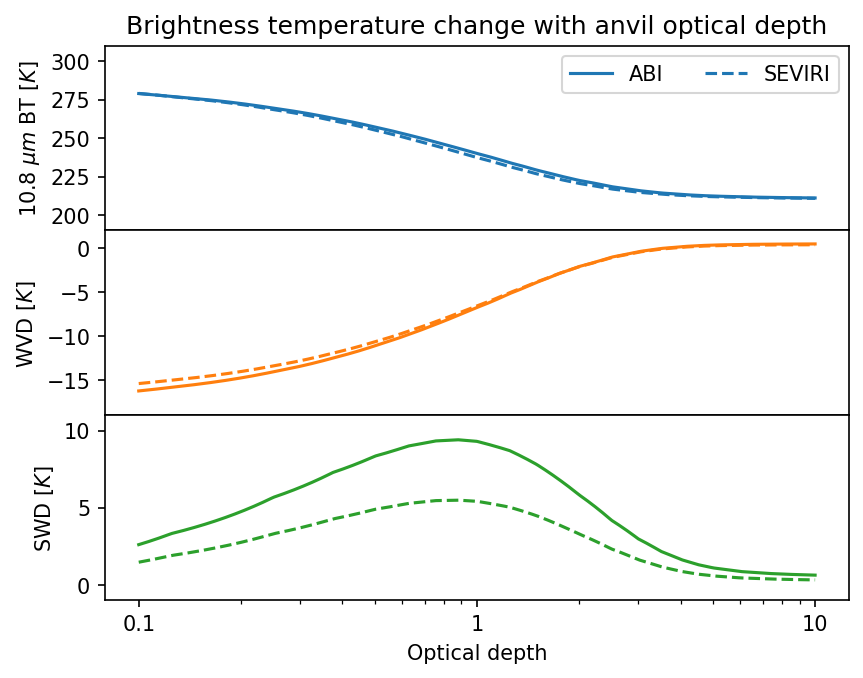

In [145]:
fig, axs = plt.subplots(3, 1, sharex=True, dpi=dpi)
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

abi_rsr = RelativeSpectralResponse('GOES-16', 'abi')

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height[-1:]):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['ch7','ch8','ch9','ch10','ch11','ch12','ch13','ch14','ch15','ch16']:
        rsr = abi_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths), weights=srf) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['ch8','ch10','ch13','ch15']}
    
    wvd_od = bt_od_func["ch8"](xvals) - bt_od_func["ch10"](xvals)
    swd_od = bt_od_func["ch13"](xvals) - bt_od_func["ch15"](xvals)
    abi_line = axs[0].plot(xlocs, bt_od_func["ch13"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")

linestyles = ["--", ":"]
for h, height in enumerate(bt_ds.height[-1:]):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.clear_sky_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['IR6.2','IR7.3','IR10.8','IR12.0']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
    sev_line = axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
    axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[2].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
# Plot each graph, and manually set the y tick values
axs[0].set_ylabel("10.8 $\mu m$ BT [$K$]")
axs[0].legend([abi_line[0], sev_line[0]], ["ABI", "SEVIRI"], ncol=2)
axs[0].set_ylim([190,310])
axs[0].set_yticks(range(200,301,25))

axs[1].set_ylabel("WVD [$K$]")
axs[1].set_yticks(range(-15,1,5))
axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[2].set_ylabel("SWD [$K$]")
axs[2].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")

Text(0.5, 0, 'Optical depth')

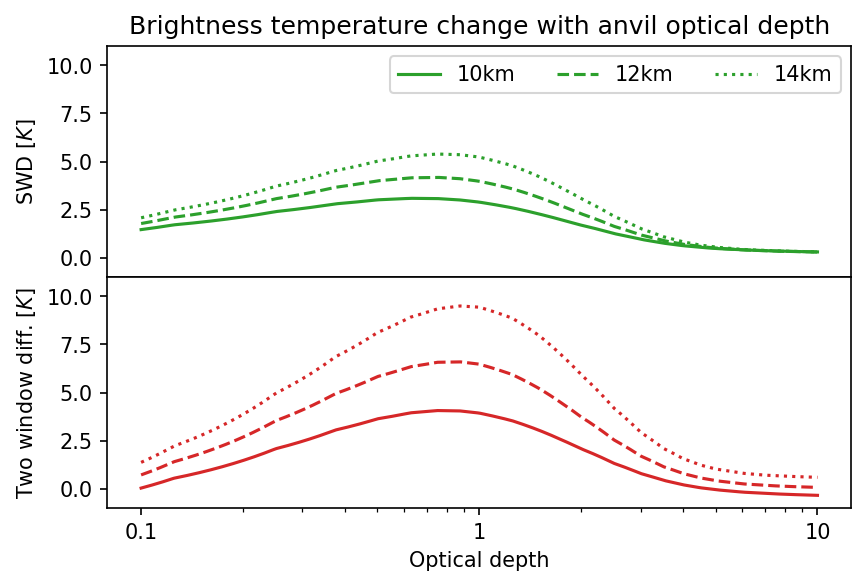

In [150]:
fig, axs = plt.subplots(2, 1, sharex=True, dpi=dpi, figsize=(6.4,4))
# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

xlocs = np.linspace(np.log(0.1), np.log(10), 1000)
xvals = np.minimum(np.exp(xlocs), 10)

seviri_rsr = RelativeSpectralResponse("Meteosat-11", "seviri")

linestyles = ["-", "--", ":"]
for h, height in enumerate(bt_ds.height):
    bt_funcs = [sp.interpolate.interp1d(bt_ds.wavelength.data, bt_ds.low_cloud_bt.data)]
    
    for i in range(len(odlist)):
        bt_funcs.append(sp.interpolate.interp1d(
            bt_ds.wavelength.data, bt_ds.anvil_with_cloud_bt.sel(height=height)[i]
        ))

    bt_by_channel = {}
    for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']:
        rsr = seviri_rsr.rsr[band]["det-1"]
        wavelengths = rsr["wavelength"]/1e6
        wh = np.logical_and(wavelengths > 3e-6, wavelengths < 15e-6)
        srf = rsr["response"]
        bt_by_channel[band] = [np.average(bt(wavelengths[wh]), weights=srf[wh]) for bt in bt_funcs]

    bt_od_func = {band:sp.interpolate.interp1d(
        [0]+odlist, bt_by_channel[band]
    ) for band in ['IR8.7', 'IR7.3', 'IR13.4', 'IR6.2', 'IR12.0', 'IR10.8', 'IR9.7', 'IR3.9']}
    
    wvd_od = bt_od_func['IR6.2'](xvals) - bt_od_func["IR7.3"](xvals)
    swd_od = bt_od_func["IR10.8"](xvals) - bt_od_func["IR12.0"](xvals)
#     axs[0].plot(xlocs, bt_od_func["IR10.8"](xvals), linestyle=linestyles[h], c="C00")
#     axs[1].plot(xlocs, wvd_od, linestyle=linestyles[h], c="C01")
    axs[0].plot(xlocs, swd_od, linestyle=linestyles[h], c="C02")
    
    twd_od = bt_od_func["IR8.7"](xvals) - bt_od_func["IR12.0"](xvals)
    axs[1].plot(xlocs, twd_od,"C3", linestyle=linestyles[h])

    co2_od = bt_od_func["IR13.4"](xvals) - bt_od_func["IR12.0"](xvals)
    co2_od2 = bt_od_func["IR13.4"](xvals) - bt_od_func["IR10.8"](xvals)
#     axs[4].plot(xlocs, co2_od,"C7", linestyle=linestyles[h])
#     axs[4].plot(xlocs, co2_od2,"C8", linestyle=linestyles[h])

# Plot each graph, and manually set the y tick values
# axs[0].set_ylabel("BT [$K$]")
axs[0].legend(["10km", "12km", "14km"], ncol=3)
# axs[0].set_ylim([190,310])
# axs[0].set_yticks(range(200,301,25))

# axs[1].set_ylabel("WVD [$K$]")
# axs[1].set_yticks(range(-15,1,5))
# axs[1].set_ylim([-19,2])
# axs[1].legend(["WVD"], loc="right")

axs[0].set_ylabel("SWD [$K$]")
axs[0].set_ylim([-1,11])
# axs[2].legend(["SWD"], loc="right")

axs[1].set_ylabel("Two window diff. [$K$]")
axs[1].set_ylim([-1,11])
# axs[3].legend(["Two window"], loc="right")

# axs[4].set_ylabel("C02 diff. [$K$]")
# axs[4].set_ylim([-25,2.5])
# axs[4].legend(["C0$_2$ - $12.0 \mu m$", "C0$_2$ - $10.8 \mu m$"], loc="right")

axs[0].set_title("Brightness temperature change with anvil optical depth")
plt.xticks([np.log(0.1), np.log(1), np.log(10)], [0.1, 1, 10])
plt.xticks(np.log(np.arange(0.1,1,0.1)).tolist() + np.log(np.arange(1,11,1)).tolist(), minor=True)
plt.xlabel("Optical depth")